# K-NEAREST NEIGHBORS FOR CLASSIFYING THE IRIS DATASET

AUTHOR: UBANDIYA Najib Yusuf, MLE

Import necessary libraries and the dataset (from sklearn)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

Loading the dataset

In [89]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginicia'})

# EDA

In [90]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [93]:
df.drop(columns='species', axis=1).skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

Visualisation

<Figure size 2000x1000 with 0 Axes>

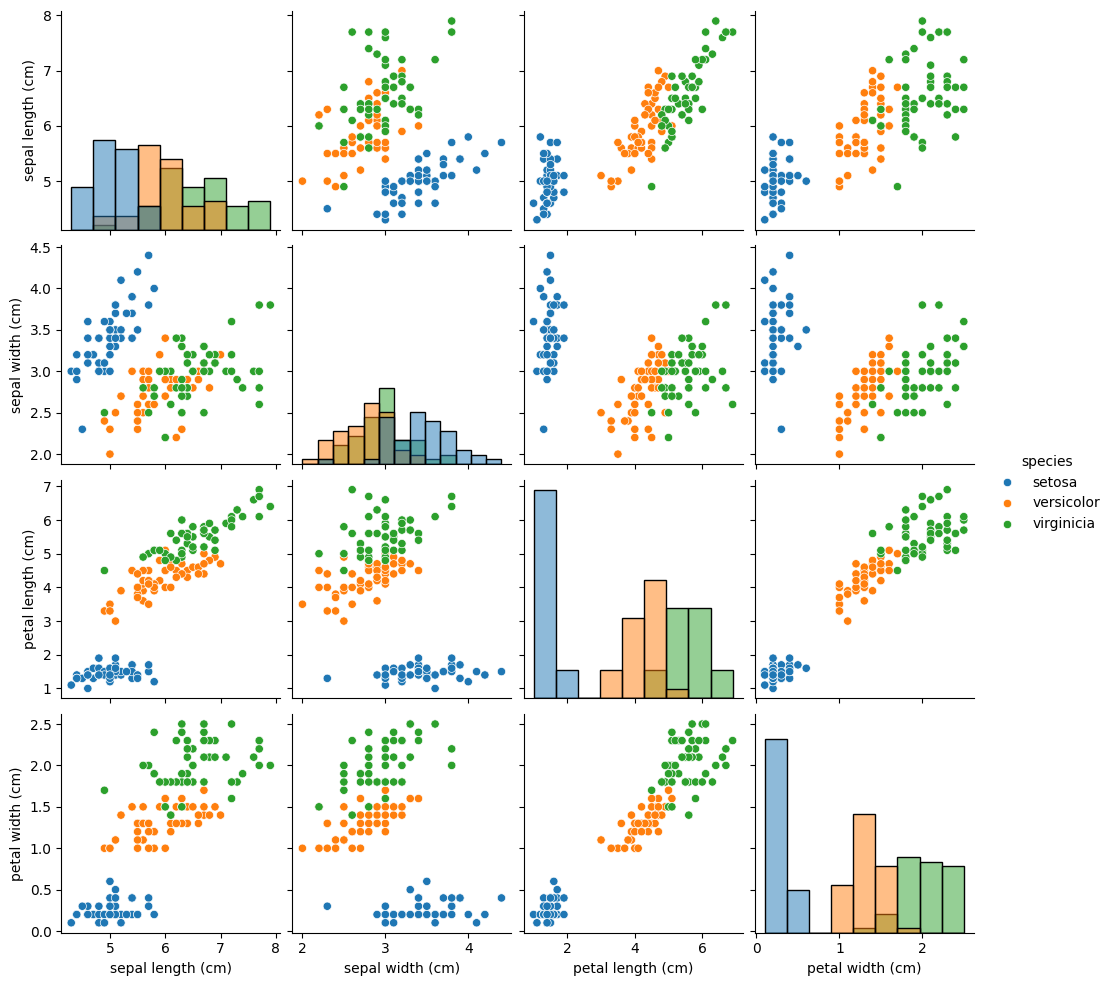

In [94]:
plt.figure(figsize=(20, 10))
sns.pairplot(df, hue='species', diag_kind='hist', height=2.5)
plt.show()

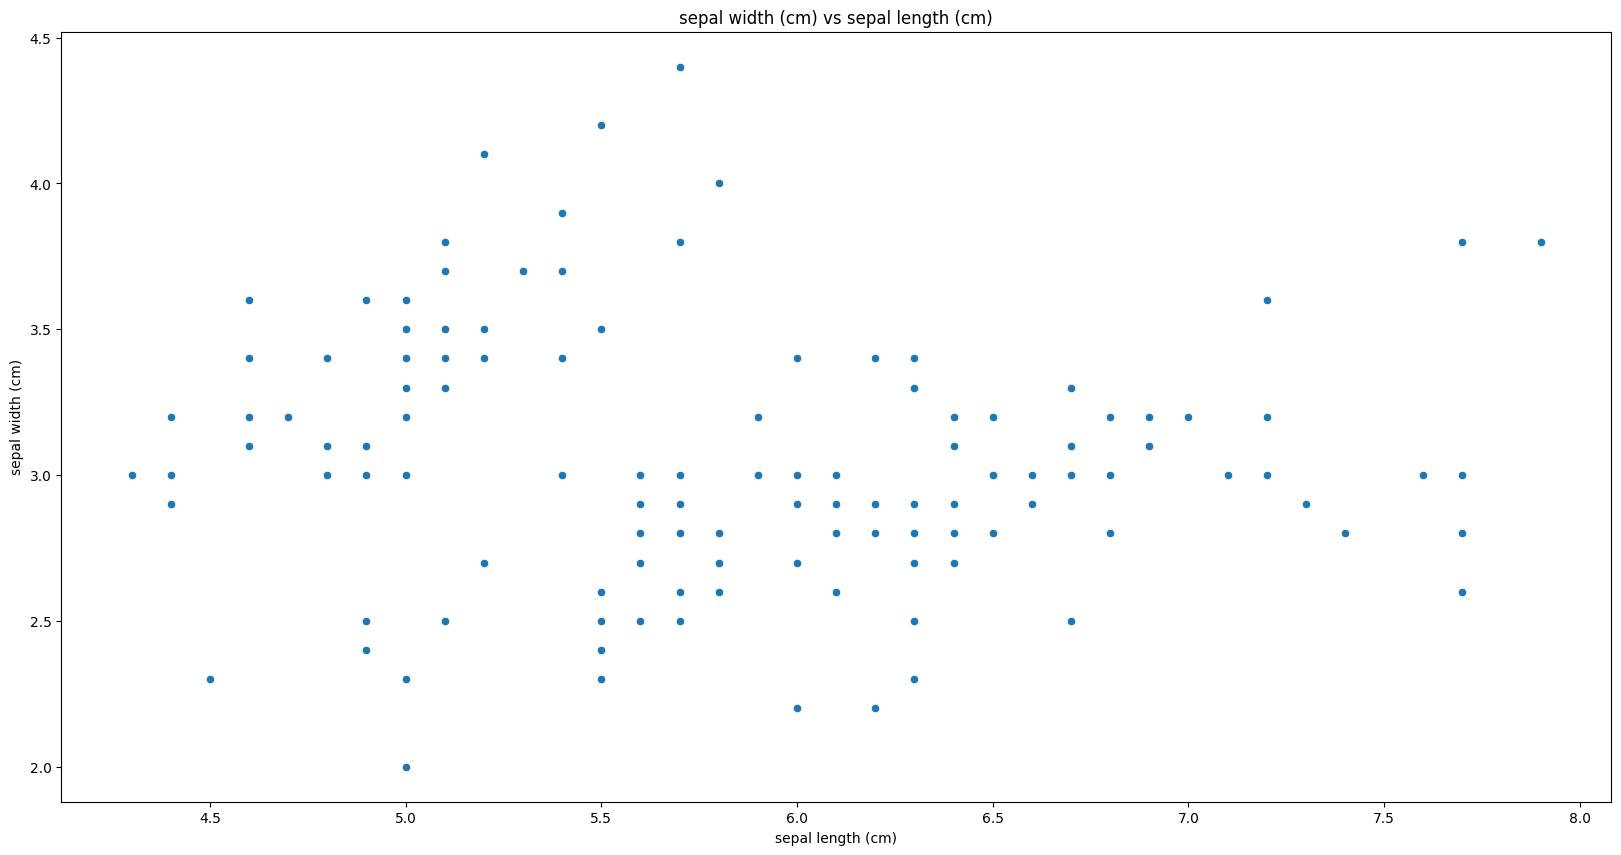

In [95]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df)
plt.title('sepal width (cm) vs sepal length (cm)')
plt.show()

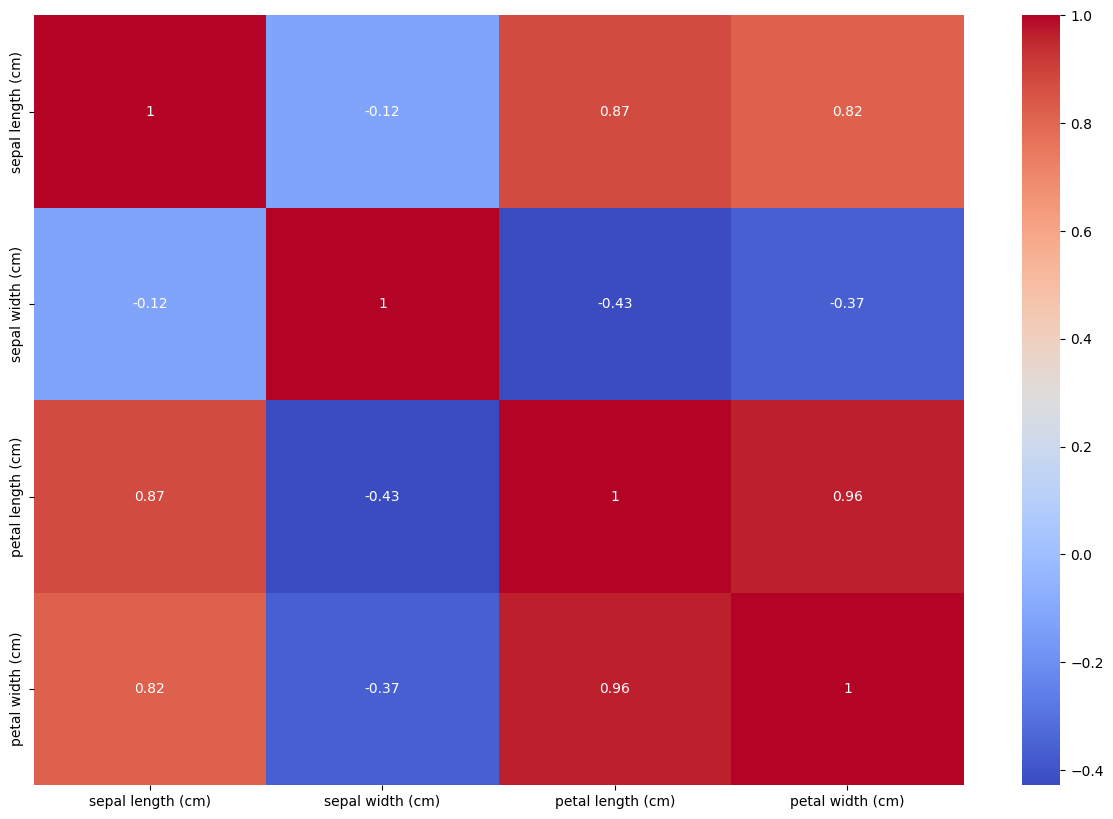

In [96]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.show()

# Data preprocessing

In [97]:
X = df.drop(columns='species', axis=1)
y = df['species']

In [98]:
X.shape

(150, 4)

In [99]:
y.shape

(150,)

Splitting the data before scaling

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (120, 4)
Testing set shape: (30, 4)


# Pipeline

In [101]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [102]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


# Fitting the model

In [103]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [104]:
y_pred_knn = pipeline.predict(X_test)
print(f'{'='*5} Performance {'='*5}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}\n')
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print()

===== Performance =====
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
  virginicia       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.9        1.        ]



# Cross-validation for different values of k

In [105]:

k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn_ = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
print(f'Best k value: {best_k}')

Best k value: 3


# Evaluation with a new sample

In [106]:
sample_flower = pd.DataFrame({
    'sepal length (cm)': [5.0],
    'sepal width (cm)': [3.5],
    'petal length (cm)': [2.2],
    'petal width (cm)': [0.2]
})
predicted_species = pipeline.predict(sample_flower)
print(f'Predicted species: {predicted_species}')
print()

Predicted species: ['setosa']



# Hyperparameter tuning

Setting parameters

In [110]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

In [111]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

In [112]:
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__n_neighbors': [3, 5, 7],
                         'knn__weights': ['uniform', 'distance']})

In [113]:
print(f'Best Parameters: {grid_search.best_params_}\n'
      f'Best Score: {grid_search.best_score_}')

Best Parameters: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Best Score: 0.9666666666666666


# Refit the model with the best parameters

In [114]:
best_knn = pipeline.set_params(**grid_search.best_params_)

In [115]:
best_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=7, weights='distance'))])

In [116]:
y_pred_final = best_knn.predict(X_test)

In [117]:
print(f'{"="*5} Final Performance {"="*5}')
print(f'Accuracy: {accuracy_score(y_test, y_pred_final)}')
print(classification_report(y_test, y_pred_final))
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_final)}')

===== Final Performance =====
Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
  virginicia       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


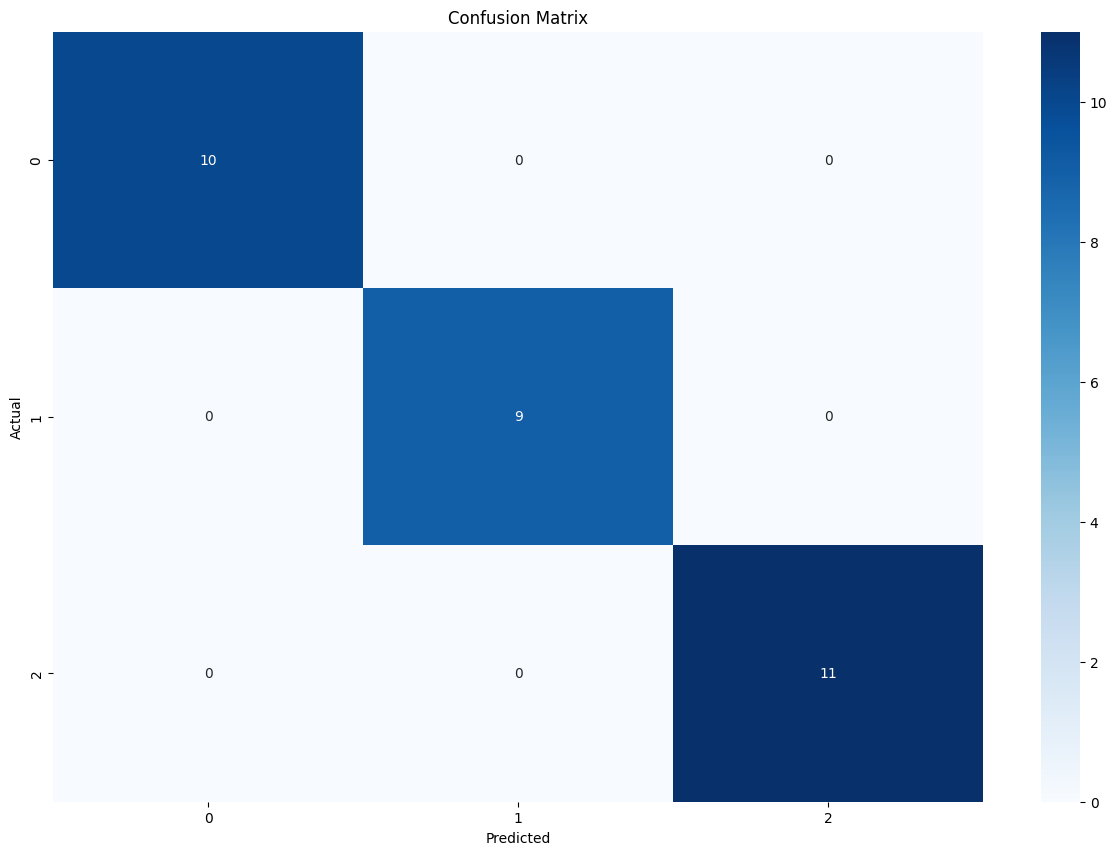

In [119]:
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()